In [1]:
import json

# 파일 경로
file_path = 'conv_senti_vali.json'

# JSON 파일 읽기
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# 데이터 확인
# print(data.keys())
# print(data['sample_key'])  # 데이터의 키와 일부 값을 출력하여 
print(data[0])


{'profile': {'persona-id': 'Pro_03802', 'persona': {'persona-id': 'A02_G01_C01', 'human': ['A02', 'G01'], 'computer': ['C01']}, 'emotion': {'emotion-id': 'S06_D02_E31', 'type': 'E31', 'situation': ['S06', 'D02']}}, 'talk': {'id': {'profile-id': 'Pro_03802', 'talk-id': 'Pro_03802_00007'}, 'content': {'HS01': '이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너무 미안해.', 'SS01': '실수하시다니 정말 미안한 마음이 크겠어요.', 'HS02': '내 능력이 부족한 거 같은데 그만 다녀야 될거같아.', 'SS02': '능력을 올리려면 어떤 방법이 있을까요?', 'HS03': '퇴근 후 여가에 회사 일을 더 열심히 해서 피해가 가지 않도록 해야겠어.', 'SS03': '꼭 좋은 결과 있길 바라요.'}}}


# EDA

1. JSON 데이터를 pandas DataFrame으로 변환.  
2. 데이터의 기본 통계 정보 및 데이터 타입을 확인.  
3. 결측치 확인.  
4. 텍스트 길이 분석.  
5. 유니크 값 확인.  
6. 상황(situation) 및 감정(emotion) 데이터 분석.  
7. 결과를 시각적으로 표현.  

In [2]:
import pandas as pd

records = []

# JSON 데이터를 pandas DataFrame으로 변환
for record in data:
    profile = record.get('profile', {})
    persona = profile.get('persona', {})
    emotion = profile.get('emotion', {})
    talk = record.get('talk', {})
    talk_id = talk.get('id', {})
    content = talk.get('content', {})
    
    record_dict = {
        'profile_id': profile.get('persona-id', ''),
        'talk_id': talk_id.get('talk-id', ''),
        'persona_id': persona.get('persona-id', ''),
        'human': ', '.join(persona.get('human', [])),  # 리스트를 문자열로 변환
        'computer': ', '.join(persona.get('computer', [])),  # 리스트를 문자열로 변환
        'emotion_id': emotion.get('emotion-id', ''),
        'emotion_type': emotion.get('type', ''),
        'situation': ', '.join(emotion.get('situation', [])),  # 리스트를 문자열로 변환
        'HS01': content.get('HS01', ''),
        'SS01': content.get('SS01', ''),
        'HS02': content.get('HS02', ''),
        'SS02': content.get('SS02', ''),
        'HS03': content.get('HS03', ''),
        'SS03': content.get('SS03', '')
    }
    records.append(record_dict)

df = pd.DataFrame(records)

# 데이터 프레임 확인
print(df.head())


  profile_id          talk_id   persona_id     human computer   emotion_id  \
0  Pro_03802  Pro_03802_00007  A02_G01_C01  A02, G01      C01  S06_D02_E31   
1  Pro_03802  Pro_03802_00012  A02_G01_C01  A02, G01      C01  S06_D02_E31   
2  Pro_03802  Pro_03802_00006  A02_G01_C01  A02, G01      C01  S06_D02_E31   
3  Pro_03802  Pro_03802_00008  A02_G01_C01  A02, G01      C01  S06_D02_E31   
4  Pro_03802  Pro_03802_00009  A02_G01_C01  A02, G01      C01  S06_D02_E31   

  emotion_type situation                                               HS01  \
0          E31  S06, D02  이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...   
1          E31  S06, D02              회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.   
2          E31  S06, D02                      상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.   
3          E31  S06, D02          이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.   
4          E31  S06, D02                       직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.   

                           SS01                         

In [3]:
# 기본 통계 정보 확인
print(df.describe(include='all'))

       profile_id          talk_id   persona_id     human computer  \
count        6640             6640         6640      6640     6640   
unique       1530             6640            8         8        1   
top     Pro_03788  Pro_03802_00007  A04_G02_C01  A04, G02      C01   
freq           25                1         1126      1126     6640   

         emotion_id emotion_type situation  \
count          6640         6640      6640   
unique          869           60        15   
top     S04_D02_E29          E10  S04, D02   
freq             39          183      1029   

                                                     HS01         SS01  \
count                                                6640         6640   
unique                                               6640         6558   
top     이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...  무슨 일 있으셨어요?   
freq                                                    1            4   

                                          HS02 

In [4]:
# 데이터 타입 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   profile_id    6640 non-null   object
 1   talk_id       6640 non-null   object
 2   persona_id    6640 non-null   object
 3   human         6640 non-null   object
 4   computer      6640 non-null   object
 5   emotion_id    6640 non-null   object
 6   emotion_type  6640 non-null   object
 7   situation     6640 non-null   object
 8   HS01          6640 non-null   object
 9   SS01          6640 non-null   object
 10  HS02          6640 non-null   object
 11  SS02          6640 non-null   object
 12  HS03          6640 non-null   object
 13  SS03          6640 non-null   object
dtypes: object(14)
memory usage: 726.4+ KB
None


In [5]:
# 결측치 확인
print(df.isnull().sum())

profile_id      0
talk_id         0
persona_id      0
human           0
computer        0
emotion_id      0
emotion_type    0
situation       0
HS01            0
SS01            0
HS02            0
SS02            0
HS03            0
SS03            0
dtype: int64


In [6]:
# 텍스트 길이 분석
df['HS01_length'] = df['HS01'].apply(len)
df['SS01_length'] = df['SS01'].apply(len)
df['HS02_length'] = df['HS02'].apply(len)
df['SS02_length'] = df['SS02'].apply(len)
df['HS03_length'] = df['HS03'].apply(len)
df['SS03_length'] = df['SS03'].apply(len)

print(df[['HS01_length', 'SS01_length', 'HS02_length', 'SS02_length', 'HS03_length', 'SS03_length']].describe())

       HS01_length  SS01_length  HS02_length  SS02_length  HS03_length  \
count  6640.000000  6640.000000  6640.000000  6640.000000   6640.00000   
mean     36.257982    28.056928    34.988253    31.305120     23.34744   
std      12.006457     9.580055    12.202533    11.147708     17.57611   
min       5.000000     7.000000     6.000000     8.000000      0.00000   
25%      28.000000    21.000000    26.000000    23.000000      0.00000   
50%      37.000000    27.000000    34.000000    29.000000     27.00000   
75%      44.000000    34.000000    43.000000    39.000000     36.00000   
max     102.000000    73.000000   101.000000    94.000000    100.00000   

       SS03_length  
count  6640.000000  
mean     20.215663  
std      14.627993  
min       0.000000  
25%       0.000000  
50%      24.000000  
75%      30.000000  
max      88.000000  


In [7]:
# 텍스트 데이터의 유니크 값 확인
for column in ['HS01', 'SS01', 'HS02', 'SS02', 'HS03', 'SS03']:
    print(f'Unique values in {column}:')
    print(df[column].value_counts())
    print()

Unique values in HS01:
HS01
이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너무 미안해.    1
새 학년이 되어서 이 선생님 수업은 오늘 처음 들어보는데 잘 가르쳐주셔서 좋아.            1
내가 학교 학생회장이 될 수 있을 거라곤 생각도 못 했는데 당선이 되어서 행복했어.          1
부모님께서 내 기말고사 성적을 보시고 자랑스러워하셔서 무척 기뻐.                    1
서술형 시험에 내 답안지가 모범 답안으로 올라서 뿌듯했어.                        1
                                                       ..
이사를 위해 재정 상태를 확인했는데 생각했던 것보다 많이 부족해서 실망했어.              1
일을 하다 다쳐서 보험금이 나오나 기대했지만 보험금은 나오지 않았어.                  1
일자리를 새로 구했는데 생각보다 급여가 많지 않아서 실망했어.                      1
아내가 돈 관리를 제대로 못 해서 생활하는 데 어려움을 겪는 게 슬프네.                1
친구들 모두 결혼하고 나만 혼자 남아서 쓸쓸하네.                             1
Name: count, Length: 6640, dtype: int64

Unique values in SS01:
SS01
무슨 일 있으셨어요?                     4
좀 더 자세히 말씀해주시겠어요?               4
무슨 일이 있으셨나요?                    3
왜 그렇게 생각하셨나요?                   3
왜 그렇게 생각하세요?                    3
                               ..
음식점이 마음에 들지 않으셨군요. 그럴 수 있어요.    1
언니가 받으려는 항암치료가 미심쩍으신 거군요.  

In [8]:
# 상황(situation) 데이터 분석
situation_data = df['situation'].str.split(', ').explode()
situation_counts = situation_data.value_counts()
print(situation_counts)

situation
D02    5721
S04    1363
D01     919
S11     761
S06     568
S13     557
S03     551
S02     496
S07     452
S10     433
S01     390
S09     380
S05     376
S08     313
Name: count, dtype: int64


In [9]:
# 감정(emotion) 데이터 분석
emotion_counts = df['emotion_type'].value_counts()
print(emotion_counts)

emotion_type
E10    183
E63    181
E62    156
E21    152
E32    148
E43    141
E31    135
E50    134
E35    134
E12    133
E15    133
E30    132
E59    132
E44    131
E17    130
E61    130
E16    129
E11    127
E53    127
E55    127
E58    126
E13    125
E67    124
E64    124
E18    124
E27    121
E69    117
E29    115
E68    114
E56    113
E24    107
E37    107
E23    107
E41    106
E52    104
E38    103
E39    103
E60    103
E66    102
E46    102
E47     98
E48     96
E28     96
E49     92
E40     91
E14     91
E36     88
E20     86
E34     85
E26     84
E25     83
E42     83
E19     82
E33     77
E57     73
E45     67
E51     64
E65     62
E22     52
E54     48
Name: count, dtype: int64


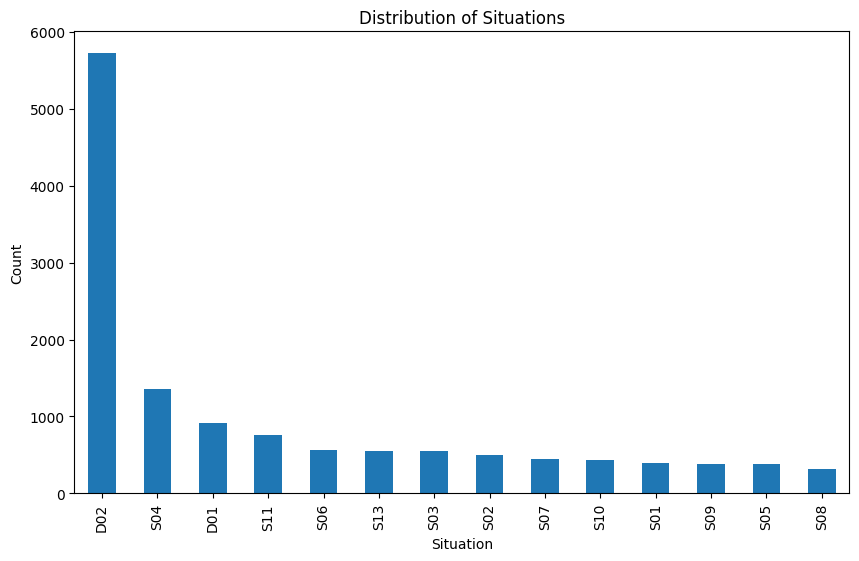

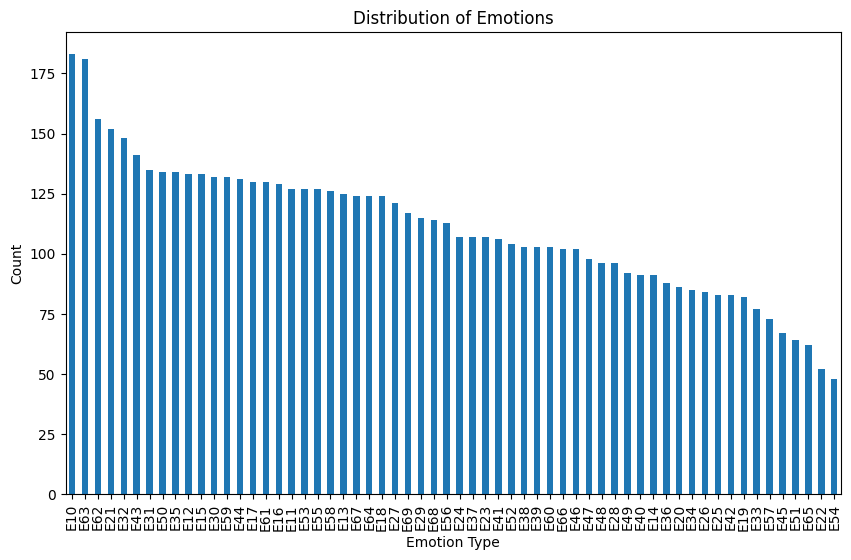

<Figure size 1000x600 with 0 Axes>

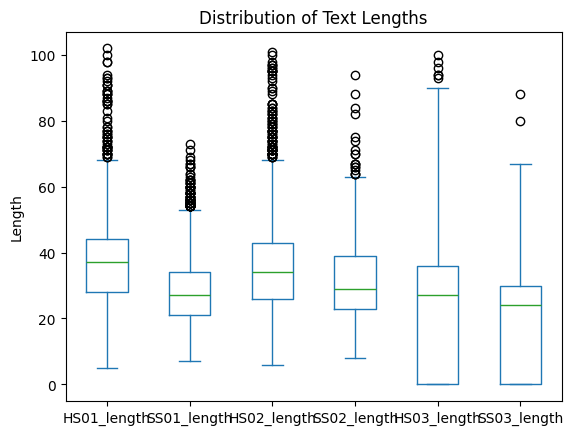

In [10]:
# 결과를 시각적으로 표현
import matplotlib.pyplot as plt

# 상황(situation) 데이터 시각화
plt.figure(figsize=(10, 6))
situation_counts.plot(kind='bar')
plt.title('Distribution of Situations')
plt.xlabel('Situation')
plt.ylabel('Count')
plt.show()

# 감정(emotion) 데이터 시각화
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion Type')
plt.ylabel('Count')
plt.show()

# 텍스트 길이 시각화
plt.figure(figsize=(10, 6))
df[['HS01_length', 'SS01_length', 'HS02_length', 'SS02_length', 'HS03_length', 'SS03_length']].plot(kind='box')
plt.title('Distribution of Text Lengths')
plt.ylabel('Length')
plt.show()

# 발화랑 emtion id만 전처리

In [11]:
import pandas as pd
import json

# Load the JSON file
file_path = 'conv_senti_vali.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract relevant information
rows = []
for entry in data:
    profile = entry['profile']
    talk_content = entry['talk']['content']
    emotion = profile['emotion']
    
    row = {
        'emotion_type': emotion['type'],
        'HS01': talk_content.get('HS01', ''),
        'HS02': talk_content.get('HS02', ''),
        'HS03': talk_content.get('HS03', '')
    }
    rows.append(row)

# Create DataFrame
df = pd.DataFrame(rows)
df.head()


,emotion_type,HS01,HS02,HS03
0,E31,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...,내 능력이 부족한 거 같은데 그만 다녀야 될거같아.,퇴근 후 여가에 회사 일을 더 열심히 해서 피해가 가지 않도록 해야겠어.
1,E31,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.,나에게 너무 크게 느껴지는 중요한 프로젝트라 버거운 느낌이 들어.,동료 직원에게 도움을 요청해서 같이 해결해야겠어.
2,E31,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.,무섭게 생겼는데도 업무를 보려면 친해져야 할 것 같단말이야.,먼저 다가가서 말을 걸어볼게.
3,E31,이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.,첫 직장이어서 잘 적응을 할 수 있을지 모르겠어.,직장 동료와 상사들이랑 친하게 지내야겠어.
4,E31,직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.,내가 낯가림이 심해서 친해질 수 있을지 모르겠어.,서로 같은 취미를 공유하고 얘기를 나누다 보면 친해질 수 있을 거 같아.


### df를 csv로 저장

In [12]:
csv_file_path = "conv_senti_vali_emotion_hs.csv"
df.to_csv(csv_file_path, index=False)

### id2label 가이드 보고 dictionary화

In [13]:
id2label_cleaned = {
    10: "분노",
    11: "툴툴대는",
    12: "좌절한",
    13: "짜증내는",
    14: "방어적인",
    15: "악의적인",
    16: "안달하는",
    17: "구역질 나는",
    18: "노여워하는",
    19: "성가신",
    20: "슬픔",
    21: "실망한",
    22: "비통한",
    23: "후회되는",
    24: "우울한",
    25: "마비된",
    26: "염세적인",
    27: "눈물이 나는",
    28: "낙담한",
    29: "환멸을 느끼는",
    30: "불안",
    31: "두려운",
    32: "스트레스 받는",
    33: "취약한",
    34: "혼란스러운",
    35: "당혹스러운",
    36: "회의적인",
    37: "걱정스러운",
    38: "조심스러운",
    39: "초조한",
    40: "상처",
    41: "질투하는",
    42: "배신당한",
    43: "고립된",
    44: "충격 받은",
    45: "가난한, 불우한",
    46: "희생된",
    47: "억울한",
    48: "괴로워하는",
    49: "버려진",
    50: "당황",
    51: "고립된(당황한)",
    52: "남의 시선을 의식하는",
    53: "외로운",
    54: "열등감",
    55: "죄책감",
    56: "부끄러운",
    57: "혐오스러운",
    58: "한심한",
    59: "혼란스러운(당황한)",
    60: "기쁨",
    61: "감사하는",
    62: "신뢰하는",
    63: "편안한",
    64: "만족스러운",
    65: "흥분",
    66: "느긋",
    67: "안도",
    68: "신이 난",
    69: "자신하는"
}

# Emotion count EDA

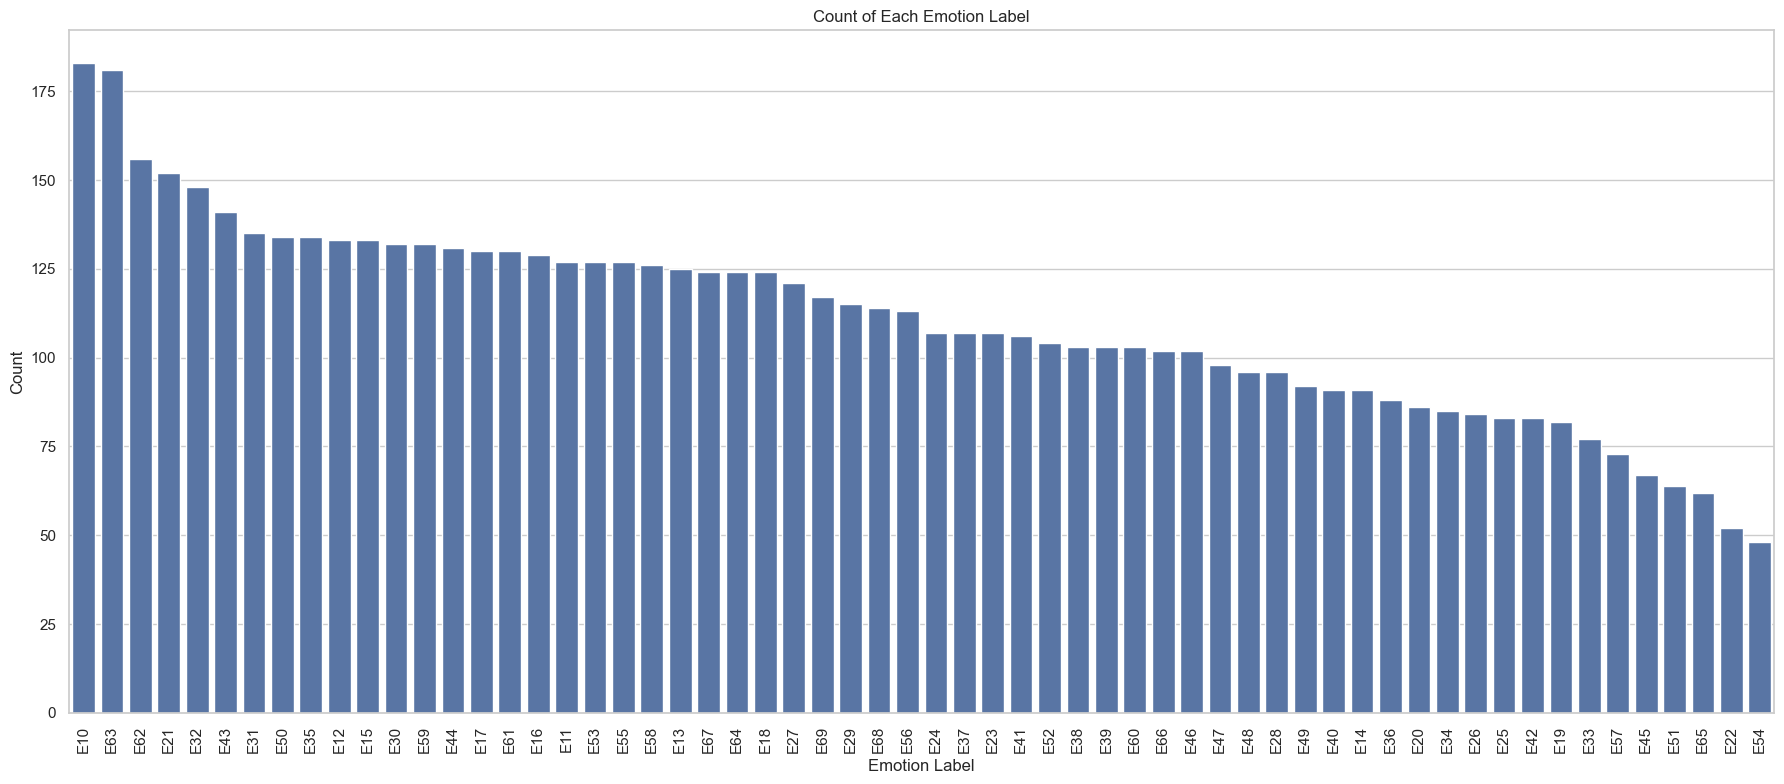

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = 'conv_senti_vali_emotion_hs.csv'

# 파일을 읽어 DataFrame으로 변환
data = pd.read_csv(file_path)

# 각 감정 레이블의 빈도 계산
emotion_counts = data['emotion_type'].value_counts()

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 감정 레이블별 데이터 빈도를 바 차트로 표시
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='emotion_type', data=data, order=emotion_counts.index)
ax.set_title('Count of Each Emotion Label')
ax.set_xlabel('Emotion Label')
ax.set_ylabel('Count')
plt.xticks(rotation=90)  # X축 레이블 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()


# HS01, HS02, HS03 HS열로해서 데이터 나누기

In [1]:
import pandas as pd

# 파일 경로 설정
file_path = 'conv_senti_vali_emotion_hs.csv'

# 파일을 읽어 DataFrame으로 변환
data = pd.read_csv(file_path)

# 'HS01', 'HS02', 'HS03' 열을 개별 행으로 전환하고, 'emotion_type' 열은 유지
long_format = pd.melt(data, id_vars=['emotion_type'], value_vars=['HS01', 'HS02', 'HS03'], var_name='HS_label', value_name='hs')

# 필요 없는 'HS_label' 열을 삭제하고, 결과 DataFrame 재구성
long_format = long_format.drop('HS_label', axis=1)

# 결과 확인
print(long_format.head())


  emotion_type                                                 hs
0          E31  이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...
1          E31              회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.
2          E31                      상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.
3          E31          이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.
4          E31                       직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.


# 결측치 확인

In [2]:
# Count the frequency of each emotion type to analyze the distribution
emotion_type_distribution = long_format['emotion_type'].value_counts()

# Checking for missing values in 'HS' column
missing_hs = long_format['hs'].isnull().sum()

print(emotion_type_distribution, "\n", missing_hs)


emotion_type
E10    549
E63    543
E62    468
E21    456
E32    444
E43    423
E31    405
E50    402
E35    402
E12    399
E15    399
E30    396
E59    396
E44    393
E17    390
E61    390
E16    387
E11    381
E53    381
E55    381
E58    378
E13    375
E67    372
E64    372
E18    372
E27    363
E69    351
E29    345
E68    342
E56    339
E24    321
E37    321
E23    321
E41    318
E52    312
E38    309
E39    309
E60    309
E66    306
E46    306
E47    294
E48    288
E28    288
E49    276
E40    273
E14    273
E36    264
E20    258
E34    255
E26    252
E25    249
E42    249
E19    246
E33    231
E57    219
E45    201
E51    192
E65    186
E22    156
E54    144
Name: count, dtype: int64 
 1955


In [3]:
long_format = long_format.dropna(subset=['hs'])

# 결과 확인
print(long_format["hs"].isnull().sum())

0


## E제거 -> 모델 학습시 id에 str 안됨

In [4]:
# Remove 'E' and convert the emotion_type IDs to integers
long_format['emotion_type'] = long_format['emotion_type'].apply(lambda x: int(x[1:]))
# 'emotion_type'의 ID 값을 10씩 빼서 새로운 범위로 조정
long_format['emotion_type'] = long_format['emotion_type'].apply(lambda x: x - 10)
long_format['labels'] = long_format['emotion_type']
long_format = long_format.drop(columns=['emotion_type'])
long_format.head()


,hs,labels
0,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...,21
1,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.,21
2,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.,21
3,이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.,21
4,직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.,21


In [5]:
csv_file_path = "valid_dataset.csv"
long_format.to_csv(csv_file_path, index=False)